## Goal: to explore data to guide future analysis
##### Intended Result: come away with some ideas to dive deeper into using more advanced methods



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('clean_crime_data.csv')

lets check out the top 20 most frequently reported types of crimes

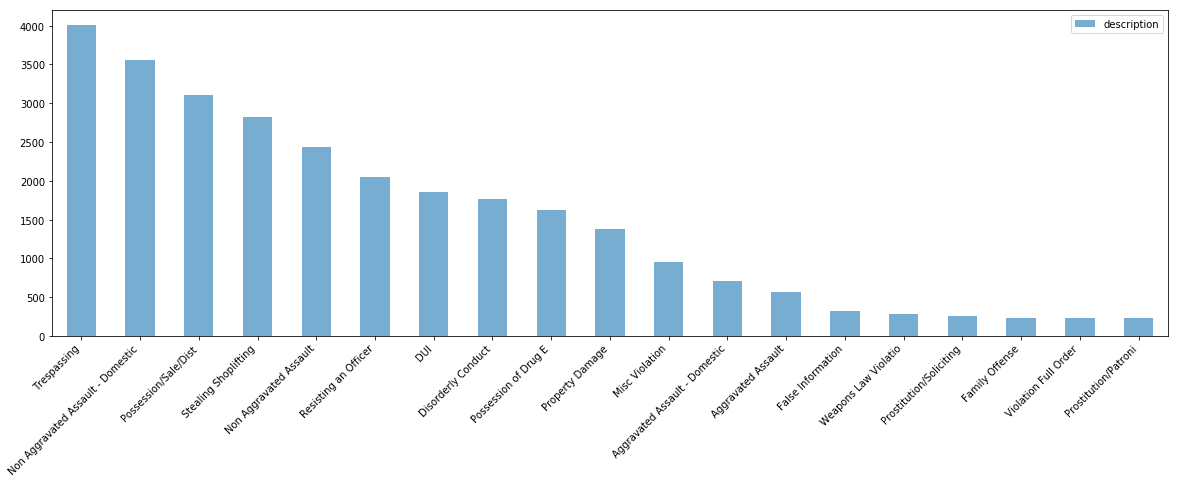

In [3]:
top_crimes = pd.DataFrame(df.description.value_counts()).iloc[0:19]

def simpleBarPlot(df):
    df.plot(kind = 'bar', alpha = .6, figsize = [20,6])
    plt.xticks(np.arange(len(df)), rotation=45, ha='right')

simpleBarPlot(top_crimes)

what about the top 20 crimes that people get arrested for most?

In [4]:
df.head()

,crime_id,from_date,description,zip_code,charge_id,dvflag,firearm_used_flag,arr,male_arr,female_arr,...,age_18_24,age_25_29,age_30_34,age_35_39,age_40_44,age_45_49,age_50_plus,total_vic,male_vic,male_vic.1
0,100034831_134,10/18/2016,Stolen Property,64130,134,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,0.0
1,130056370_946,7/3/2016,Possession/Sale/Dist,64133,946,0,0,1,1,0,...,0,0,0,0,0,0,1,0.0,0.0,0.0
2,140071459_134,3/26/2016,Stolen Property,64130,134,0,0,1,1,0,...,0,1,0,0,0,0,0,1.0,1.0,0.0
3,150064182_946,08/26/2018,Possession/Sale/Dist,64157,946,0,0,1,1,0,...,0,0,0,0,0,1,0,0.0,0.0,0.0
4,150082191_946,10/18/2017,Possession/Sale/Dist,64105,946,0,0,1,1,0,...,1,0,0,0,0,0,0,0.0,0.0,0.0


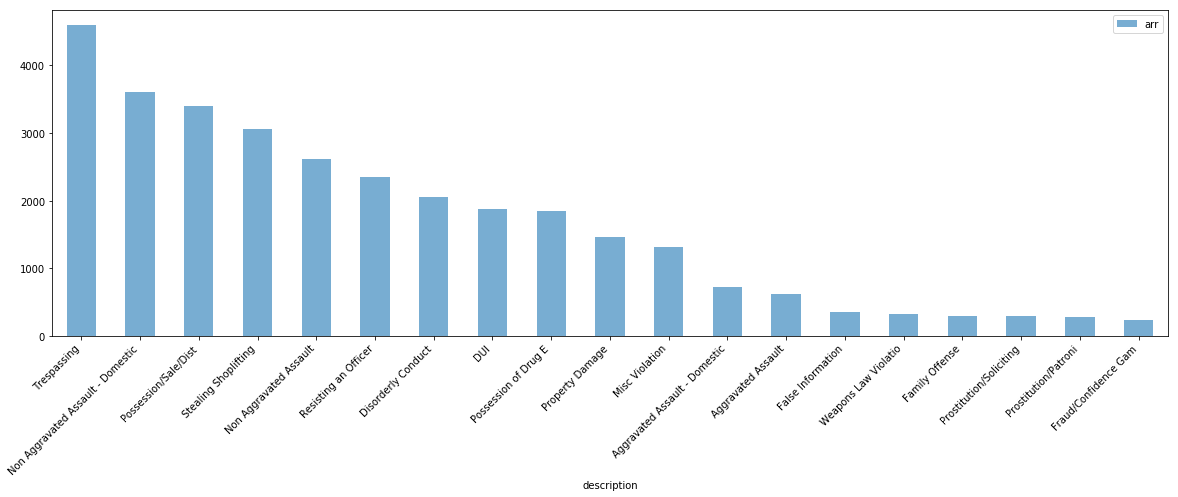

In [8]:
simpleBarPlot(df[['description',
                  'arr']].groupby('description').sum().sort_values('arr',
                                                                        ascending = False).iloc[0:19])

###### What kinds of crimes involve the most amounts of guns?

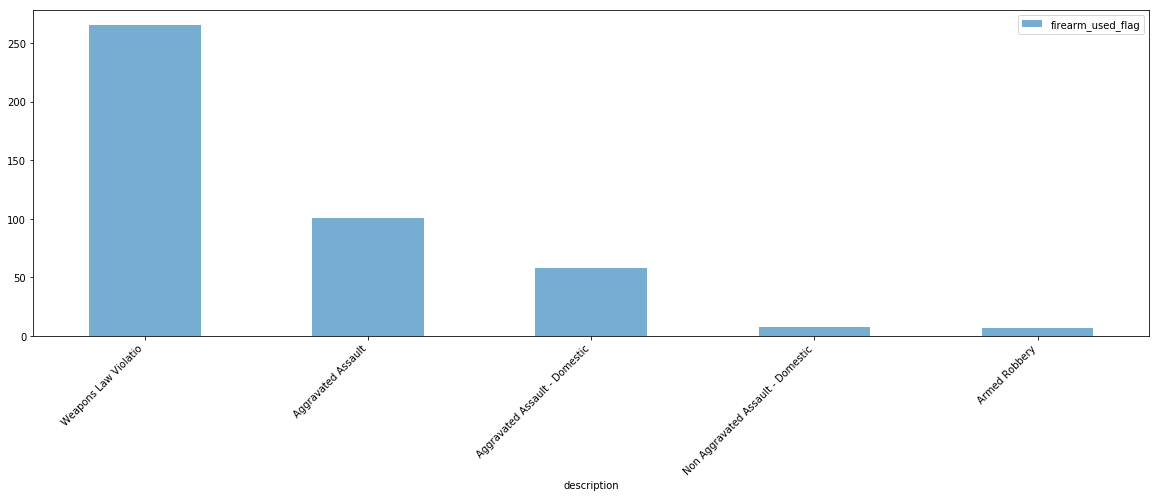

In [11]:
simpleBarPlot(df[['description',
                  'firearm_used_flag']].groupby('description').sum().sort_values('firearm_used_flag',
                                                                                 ascending = False).iloc[0:5])

Weapons laws violations involve guns the most often... suprising... This might be cool to do a regression on later

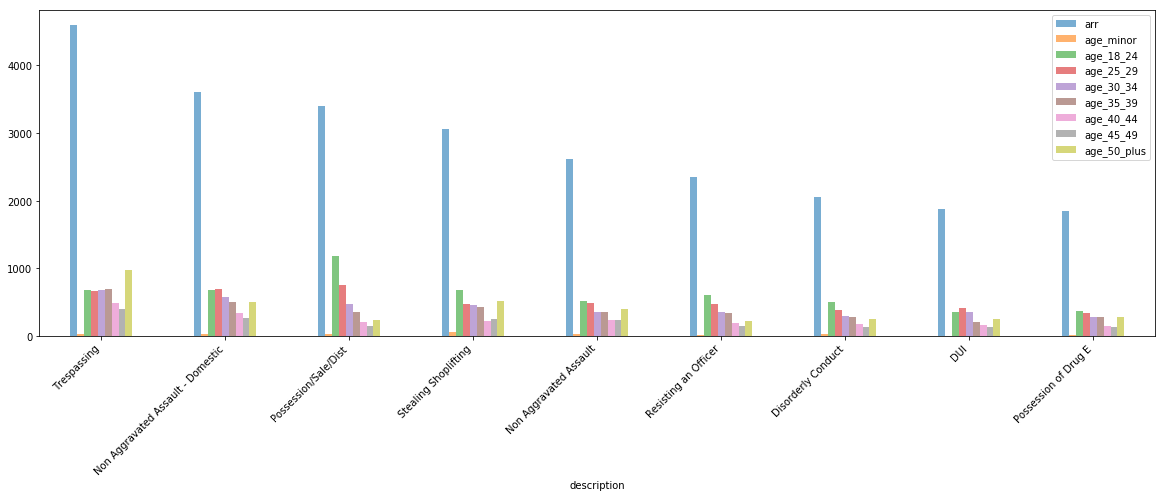

In [34]:
simpleBarPlot(df[['description','arr', 'age_minor','age_18_24', 'age_25_29', 'age_30_34',
       'age_35_39', 'age_40_44', 'age_45_49', 'age_50_plus']].groupby('description').sum().sort_values('arr',
                                                                                 ascending = False).iloc[0:9])

So it seems like younger people are getting arrested for drugs more often, but its very intresting that people 50 or above are getting arrested for trespassing and stealing. 